<a href="https://colab.research.google.com/github/nishanahafsath/DeepLearning/blob/main/celebrity_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score





In [2]:
# Set the dimensions of your input images
height, width, channels = 64, 64, 3  # Adjust as needed

# Define data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Specify the path to your dataset and the dimensions of your images
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/datasets/Dataset_Celebrities/cropped',
    target_size=(height, width),
    batch_size=32,
    class_mode='categorical'  # Multi-class classification (celebrity names)
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/datasets/Dataset_Celebrities/cropped',
    target_size=(height, width),
    batch_size=32,
    class_mode='categorical'
)

Found 168 images belonging to 5 classes.
Found 168 images belonging to 5 classes.


In [3]:
# Create the model
def create_model(input_shape, num_classes):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Multi-class classification

    return model

# Get the number of classes from your dataset
num_classes = len(train_generator.class_indices)

# Create the model
model = create_model((height, width, channels), num_classes)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Evaluate the model on the validation dataset
val_accuracy = model.evaluate(val_generator)[1]
print(f'Validation Accuracy: {val_accuracy}')

# Evaluation Metrics
def evaluate_model(model, generator):
    y_true = generator.classes
    y_pred_probs = model.predict(generator)
    y_pred = tf.argmax(y_pred_probs, axis=1)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return accuracy, precision, recall, f1

# Evaluate the model on the validation dataset using custom evaluation function
accuracy, precision, recall, f1 = evaluate_model(model, val_generator)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}')


Epoch 1/10
6/6 [==============================] - 7s 1s/step - loss: 1.5984 - accuracy: 0.2143 - val_loss: 1.5941 - val_accuracy: 0.2440
Epoch 2/10
6/6 [==============================] - 6s 981ms/step - loss: 1.5908 - accuracy: 0.2440 - val_loss: 1.5389 - val_accuracy: 0.2440
Epoch 3/10
6/6 [==============================] - 6s 1s/step - loss: 1.5293 - accuracy: 0.2679 - val_loss: 1.4614 - val_accuracy: 0.3750
Epoch 4/10
6/6 [==============================] - 7s 1s/step - loss: 1.4109 - accuracy: 0.5179 - val_loss: 1.3556 - val_accuracy: 0.5595
Epoch 5/10
6/6 [==============================] - 3s 560ms/step - loss: 1.2443 - accuracy: 0.6190 - val_loss: 1.1173 - val_accuracy: 0.4762
Epoch 6/10
6/6 [==============================] - 4s 676ms/step - loss: 1.0656 - accuracy: 0.5952 - val_loss: 0.9105 - val_accuracy: 0.7262
Epoch 7/10
6/6 [==============================] - 3s 559ms/step - loss: 0.8277 - accuracy: 0.7500 - val_loss: 0.5452 - val_accuracy: 0.8929
Epoch 8/10
6/6 [=============

In [4]:
class_report = evaluate_model(model, val_generator)

6/6 [==============================] - 1s 170ms/step


In [5]:
print('Classification Report:\n', class_report)



Classification Report:
 (0.19047619047619047, 0.18960478187522664, 0.19047619047619047, 0.1895069745069745)


In [6]:
import matplotlib.pyplot as plt

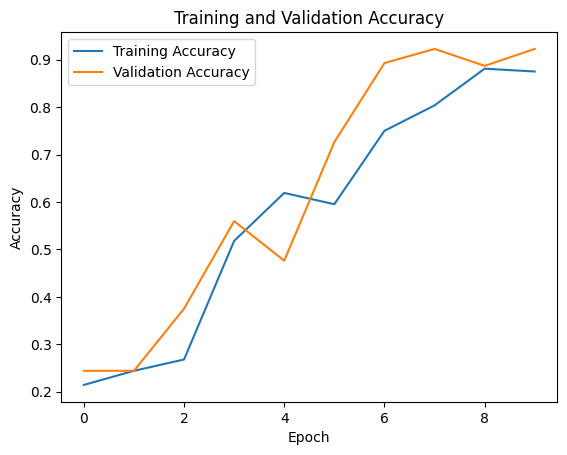

In [7]:
# Plot training history
def plot_history(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history)


In [8]:

# Save the trained model
model.save('celebrity_classifier_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
